### aim: 

### date: 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

## check that the uwnds are different ncar/doe

In [41]:
w = xr.open_dataset('uwnd.10m.gauss.1980DOE.nc')
ncepdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/'
ndoe = xr.open_dataset(f'{ncepdir}/windU/uwnd.10m.gauss.1980.nc')
w2 = ndoe

q = (w.uwnd.values - w2.uwnd.values)
print(np.nanmax(q))
print(np.nanmin(q))


w = xr.open_dataset('uwnd.10m.gauss.1980NCAR.nc')
ncepdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/'
nncar = xr.open_dataset(f'{ncepdir}/windU/uwnd.10m.gauss.1980.nc')
w2 = nncar

q = (w.uwnd.values - w2.uwnd.values)
print(np.nanmax(q))
print(np.nanmin(q))

0.0
0.0
0.0
0.0


In [42]:
duwnd = ndoe.uwnd.squeeze()
nuwnd = nncar.uwnd.squeeze()

0.10903645


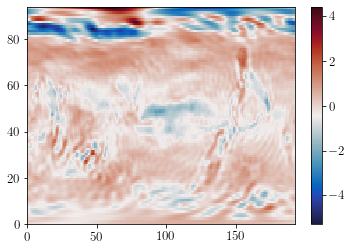

In [43]:
dmuwnd = duwnd.mean(dim = 'time')
nmuwnd = nuwnd.mean(dim = 'time')

q = plt.pcolormesh(dmuwnd - nmuwnd, cmap = cm.balance)
plt.colorbar(q)
tv = dmuwnd - nmuwnd
print(np.nanmean(tv[30,:]))

In [47]:
y = 1980
for y in range(1980,2024):
    ncepdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/'
    nncar = xr.open_dataset(f'{ncepdir}/daily/wspd.10m.gauss.{y}_daily.nc')
    ncepdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/'
    ndoe = xr.open_dataset(f'{ncepdir}/daily/wspd.10m.gauss.{y}_daily.nc')
    
    duwnd = ndoe.windspeed.squeeze()
    nuwnd = nncar.windspeed.squeeze()

    dmuwnd = duwnd.mean(dim = 'time')
    nmuwnd = nuwnd.mean(dim = 'time')

    # q = plt.pcolormesh(dmuwnd - nmuwnd, cmap = cm.balance)
    # plt.colorbar(q)
    tv = dmuwnd - nmuwnd
    print(f'{y} {np.nanmean(tv[30,:])}')

1980 0.8189743161201477
1981 0.7981910705566406
1982 0.7954573035240173
1983 0.8127057552337646
1984 0.8151254653930664
1985 0.8534398078918457
1986 0.8060329556465149
1987 0.8534294962882996
1988 0.8242080211639404
1989 0.8070403933525085
1990 0.790911853313446
1991 0.8417600989341736
1992 0.8531332612037659
1993 0.8623643517494202
1994 0.8434095978736877
1995 0.865301787853241
1996 0.9271357655525208
1997 0.8479291796684265
1998 0.8274038434028625
1999 0.8363884091377258
2000 0.8218312859535217
2001 0.8938536643981934
2002 0.8787527084350586
2003 0.9168278574943542
2004 0.9073039889335632
2005 0.9277550578117371
2006 0.8943780064582825
2007 0.888174831867218
2008 0.9221447110176086
2009 0.9124053120613098
2010 0.9337096214294434
2011 0.9096953272819519
2012 0.9315022826194763
2013 0.936720609664917
2014 0.9173803925514221
2015 0.8914344906806946
2016 0.9055309891700745
2017 0.8882740139961243
2018 0.8827535510063171
2019 0.9086597561836243
2020 0.8734359741210938
2021 0.8473308086395

# UKESM 

In [5]:
tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/symlinked_hrly_UKESM/newdaily/'
cdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/UKESM/'
mons = ['01','02','03','04','05','06','07','08','09','10','11','12']
scens = ['1B']

ex = False
if ex:
    for s in scens:
        for y in range(1940,2024):
            print(y)
            for i in range(0,12):
                uwi = xr.open_dataset(f'{tdir}scen{s}_uwnd_y{y}m{mons[i]}_rg.nc')
                vwi = xr.open_dataset(f'{tdir}scen{s}_vwnd_y{y}m{mons[i]}_rg.nc')

                wspd = xr.ufuncs.sqrt(uwi.uwind10m**2 + vwi.vwind10m**2)
                wspd.name = 'wspd10m'
                wb = xr.merge([uwi, vwi, wspd])
                wb = wb.rename({"uwind10m": "u10m"})
                wb = wb.rename({"vwind10m": "v10m"})
                savenam = f'UKESM_wind_daily_1x1_{y}m{mons[i]}.nc'
                print(savenam)
                wb.attrs = {'howmade': 'https://nettle-pajama-b85.notion.site/Winds-eval-paper-notes-76fc22d90ce14e23b8247ba370b15265?pvs=4'}
                wb.to_netcdf(f'{cdir}{savenam}')


In [6]:
ex = False

if ex:
    
    tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/UKESM/'

    for y in range(1940,2024):
    
        print(y)
        m01 = xr.open_dataset(f'{tdir}UKESM_wind_daily_1x1_{y}m01.nc')
        m02 = xr.open_dataset(f'{tdir}UKESM_wind_daily_1x1_{y}m02.nc')
        m03 = xr.open_dataset(f'{tdir}UKESM_wind_daily_1x1_{y}m03.nc')
        m04 = xr.open_dataset(f'{tdir}UKESM_wind_daily_1x1_{y}m04.nc')
        m05 = xr.open_dataset(f'{tdir}UKESM_wind_daily_1x1_{y}m05.nc')
        m06 = xr.open_dataset(f'{tdir}UKESM_wind_daily_1x1_{y}m06.nc')
        m07 = xr.open_dataset(f'{tdir}UKESM_wind_daily_1x1_{y}m07.nc')
        m08 = xr.open_dataset(f'{tdir}UKESM_wind_daily_1x1_{y}m08.nc')
        m09 = xr.open_dataset(f'{tdir}UKESM_wind_daily_1x1_{y}m09.nc')
        m10 = xr.open_dataset(f'{tdir}UKESM_wind_daily_1x1_{y}m10.nc')
        m11 = xr.open_dataset(f'{tdir}UKESM_wind_daily_1x1_{y}m11.nc')
        m12 = xr.open_dataset(f'{tdir}UKESM_wind_daily_1x1_{y}m12.nc')

        m01 = xr.open_dataset(f'{tdir}UKESM_wind_daily_1x1_{y}m01.nc')

        stacked = xr.concat([m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12], dim="time_counter")
        stacked.to_netcdf(f'{tdir}UKESM_wind_daily_1x1_{y}.nc')

In [7]:
w = xr.open_dataset(f'{cdir}UKESM_wind_daily_1x1_{1948}m{mons[0]}.nc')


## NCEP-NCAR

In [8]:
yst = 1948; yen = 2024
tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/daily/'
cdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/'

ex = False

if ex:

    for i in range(yst,yen):

        print(i)
        
        times = pd.date_range(f"{i}/01/01",f"{i+1}/01/01",freq='D',closed='left')

        ws = xr.open_dataset(f'{tdir}wspd.10m.gauss.{i}_daily_rg.nc')
        wu = xr.open_dataset(f'{tdir}uwnd.10m.gauss.{i}_daily_rg.nc')
        wv = xr.open_dataset(f'{tdir}vwnd.10m.gauss.{i}_daily_rg.nc')
        
        wb = xr.merge([ws, wu, wv])
        
        wb = wb.rename({"time": "time_counter"})
        wb['time_counter'] = times
        wb = wb.rename({"uwnd": "u10m"})
        wb = wb.rename({"vwnd": "v10m"})
        wb = wb.rename({"windspeed": "wspd10m"})

        savenam = f'NCEP-NCAR_wind_daily_1x1_{i}.nc'
        print(savenam)
        wb.attrs = {'howmade': 'https://nettle-pajama-b85.notion.site/Winds-eval-paper-notes-76fc22d90ce14e23b8247ba370b15265?pvs=4'}
        wb.to_netcdf(f'{cdir}/NCEP-NCAR/{savenam}')

## NCEP-DOE

In [10]:
yst = 1979; yen = 2024
tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/daily/'
cdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/'

ex = False

if ex:

    for i in range(yst,yen):

        print(i)
        
        times = pd.date_range(f"{i}/01/01",f"{i+1}/01/01",freq='D',closed='left')

        ws = xr.open_dataset(f'{tdir}wspd.10m.gauss.{i}_daily_rg.nc')
        wu = xr.open_dataset(f'{tdir}uwnd.10m.gauss.{i}_daily_rg.nc')
        wv = xr.open_dataset(f'{tdir}vwnd.10m.gauss.{i}_daily_rg.nc')
        
        ws = ws.squeeze()
        wu = wu.squeeze()
        wv = wv.squeeze()
        
        wb = xr.merge([ws, wu, wv])
        
        wb = wb.rename({"time": "time_counter"})
        wb['time_counter'] = times
        wb = wb.rename({"uwnd": "u10m"})
        wb = wb.rename({"vwnd": "v10m"})
        wb = wb.rename({"windspeed": "wspd10m"})

        savenam = f'NCEP-DOE_wind_daily_1x1_{i}.nc'
        print(savenam)
        wb.attrs = {'howmade': 'https://nettle-pajama-b85.notion.site/Winds-eval-paper-notes-76fc22d90ce14e23b8247ba370b15265?pvs=4'}
        wb.to_netcdf(f'{cdir}/NCEP-DOE/{savenam}')
        
wb

1979
NCEP-DOE_wind_daily_1x1_1979.nc
1980
NCEP-DOE_wind_daily_1x1_1980.nc
1981
NCEP-DOE_wind_daily_1x1_1981.nc
1982
NCEP-DOE_wind_daily_1x1_1982.nc
1983
NCEP-DOE_wind_daily_1x1_1983.nc
1984
NCEP-DOE_wind_daily_1x1_1984.nc
1985
NCEP-DOE_wind_daily_1x1_1985.nc
1986
NCEP-DOE_wind_daily_1x1_1986.nc
1987
NCEP-DOE_wind_daily_1x1_1987.nc
1988
NCEP-DOE_wind_daily_1x1_1988.nc
1989
NCEP-DOE_wind_daily_1x1_1989.nc
1990
NCEP-DOE_wind_daily_1x1_1990.nc
1991
NCEP-DOE_wind_daily_1x1_1991.nc
1992
NCEP-DOE_wind_daily_1x1_1992.nc
1993
NCEP-DOE_wind_daily_1x1_1993.nc
1994
NCEP-DOE_wind_daily_1x1_1994.nc
1995
NCEP-DOE_wind_daily_1x1_1995.nc
1996
NCEP-DOE_wind_daily_1x1_1996.nc
1997
NCEP-DOE_wind_daily_1x1_1997.nc
1998
NCEP-DOE_wind_daily_1x1_1998.nc
1999
NCEP-DOE_wind_daily_1x1_1999.nc
2000
NCEP-DOE_wind_daily_1x1_2000.nc
2001
NCEP-DOE_wind_daily_1x1_2001.nc
2002
NCEP-DOE_wind_daily_1x1_2002.nc
2003
NCEP-DOE_wind_daily_1x1_2003.nc
2004
NCEP-DOE_wind_daily_1x1_2004.nc
2005
NCEP-DOE_wind_daily_1x1_2005.nc
2

<xarray.Dataset>
Dimensions:       (lat: 180, lon: 360, time_counter: 365)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2023-01-01 ... 2023-12-31
  * lon           (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat           (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    level         float32 10.0
Data variables:
    wspd10m       (time_counter, lat, lon) float32 ...
    u10m          (time_counter, lat, lon) float32 ...
    v10m          (time_counter, lat, lon) float32 ...
Attributes:
    howmade:  https://nettle-pajama-b85.notion.site/Winds-eval-paper-notes-76...

# ERA5

In [ ]:
yst = 1970; yen = 1971
tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/ERA5_v2024/scripts/daily/'
cdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/'

ex = False

if ex:

    for i in range(yst,yen):

        print(i)
        
        times = pd.date_range(f"{i}/01/01",f"{i+1}/01/01",freq='D',closed='left')

        ws = xr.open_dataset(f'{tdir}10m_windspeed_ERA5_{i}_daily_rg.nc')
        wu = xr.open_dataset(f'{tdir}10m_u_component_of_wind_ERA5_{i}_daily_rg.nc')
        wv = xr.open_dataset(f'{tdir}10m_v_component_of_wind_ERA5_{i}_daily_rg.nc')
        
        wb = xr.merge([ws, wu, wv])
        
        wb = wb.rename({"time": "time_counter"})
        wb['time_counter'] = times
        wb = wb.rename({"u10": "u10m"})
        wb = wb.rename({"v10": "v10m"})
        wb = wb.rename({"windspeed": "wspd10m"})

        savenam = f'ERA5_wind_daily_1x1_{i}.nc'
        print(savenam)
        wb.attrs = {'howmade': 'https://nettle-pajama-b85.notion.site/Winds-eval-paper-notes-76fc22d90ce14e23b8247ba370b15265?pvs=4'}
        wb.to_netcdf(f'{cdir}/ERA5/{savenam}')

In [ ]:
plt.pcolormesh(wb.wspd10m[0,:,:])